In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# !ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
# !pip install gputil
# !pip install psutil
# !pip install humanize
# import psutil
# import humanize
# import os
# import GPUtil as GPU
# GPUs = GPU.getGPUs()
# # XXX: only one GPU on Colab and isn’t guaranteed
# gpu = GPUs[0]
# def printm():
#  process = psutil.Process(os.getpid())
#  print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
#  print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
# printm()

In [0]:
# !pip install torch torchvision
# !cd syntaxsql && python -c 'from allen_models.col_predictor import ColPredictor'

Better speed can be achieved with apex installed from https://www.github.com/nvidia/apex.


In [0]:
import pickle
work_dir= "gdrive/My Drive/independent_study/syntaxSQL-master"
_work_dir= "gdrive/My\ Drive/independent_study/syntaxSQL-master"
!ln -s "gdrive/My Drive/independent_study/syntaxSQL-master" syntaxsql
!export CUDA_VISIBLE_DEVICES=0,2,3
all_vars={}

def write_vars(): 
  var_file= open(work_dir+"/variables",'w')
#   all_vars= globals()
#   print all_vars
  pickle.dump(all_vars,var_file)
  var_file.close()

def read_vars():
  var_file= open(work_dir+"/variables",'r')
  all_vars=pickle.load(var_file)
  var_file.close()
#   print all_vars
  return all_vars

In [0]:
#! cd $_work_dir && wget https://nlp.stanford.edu/data/wordvecs/glove.42B.300d.zip

In [0]:
#! cd $_work_dir && unzip glove.42B.300d.zip
# !ln -s "gdrive/My Drive" drive
# !cd drive && ls
# !ln -s "gdrive/My Drive/independent_study/syntaxSQL-master" syntaxsql
# ! cd syntaxsql && ls
# ! python syntaxsql/test.py
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
!pip install allennlp



import allennlp

    100% |████████████████████████████████| 5.6MB 5.7MB/s 
    100% |████████████████████████████████| 51kB 20.3MB/s 
    100% |████████████████████████████████| 512kB 22.7MB/s 
    100% |████████████████████████████████| 133kB 29.6MB/s 
    100% |████████████████████████████████| 12.6MB 2.7MB/s 
    100% |████████████████████████████████| 122kB 28.2MB/s 
    100% |████████████████████████████████| 51kB 19.1MB/s 
    100% |████████████████████████████████| 552kB 24.8MB/s 
    100% |████████████████████████████████| 245kB 27.5MB/s 
    100% |████████████████████████████████| 1.5MB 13.8MB/s 
    100% |████████████████████████████████| 4.5MB 3.1MB/s 
    100% |████████████████████████████████| 51kB 16.1MB/s 
    100% |████████████████████████████████| 143kB 28.4MB/s 
    100% |████████████████████████████████| 2.3MB 11.8MB/s 
    100% |████████████████████████████████| 61kB 16.4MB/s 
    100% |████████████████████████████████| 51kB 17.4MB/s 
    100% |████████████████████████████████| 9.7

In [0]:
import allennlp

In [0]:
%%shell 

# ## full + aug
hs=full
tbl=std
d_type="_augment"

# ## - aug
# hs=full
# tbl=std
# d_type=""

## - aug - table
# hs=full
# tbl=no
# d_type=""

# ## - aug - table -history
# hs=no
# tbl=no
# d_type=""


toy="--toy"
# toy=""
# epoch=1 # 600 for spider, 200 for +aug

DATE=`date '+%Y-%m-%d-%H:%M:%S'`

data_root=syntaxsql/generated_datasets/generated_data${d_type}
save_dir="${data_root}/saved_models_hs=${hs}_tbl=${tbl}_${DATE}"
log_dir=${save_dir}/train_log
mkdir -p ${save_dir}
mkdir -p ${log_dir}


export CUDA_VISIBLE_DEVICES=0
module=col
epoch=200
python syntaxsql/train.py \
  --data_root    ${data_root} \
  --save_dir     ${save_dir} \
  --history_type ${hs} \
  --table_type   ${tbl} \
  --train_component ${module} \
  --epoch        ${epoch} \
  ${toy} \
  > "${log_dir}/train_${d_type}_hs=${hs}_tbl=${tbl}_${module}_${DATE}.txt" \
  2>&1 

In [0]:
%%shell 

# ## full + aug
hs=full
tbl=std
d_type="_augment"

# ## - aug
# hs=full
# tbl=std
# d_type=""

## - aug - table
# hs=full
# tbl=no
# d_type=""

# ## - aug - table -history
# hs=no
# tbl=no
# d_type=""

# toy="--toy"
toy=""

DATE=`date '+%Y-%m-%d-%H:%M:%S'`

data_root=syntaxsql/generated_datasets/generated_data${d_type}
save_dir="${data_root}/saved_models_hs=${hs}_tbl=${tbl}_${DATE}"
log_dir=${save_dir}/train_log
mkdir -p ${save_dir}
mkdir -p ${log_dir}


export CUDA_VISIBLE_DEVICES=0
module=col
epoch=600
python syntaxsql/train.py \
  --data_root    ${data_root} \
  --save_dir     ${save_dir} \
  --history_type ${hs} \
  --table_type   ${tbl} \
  --train_component ${module} \
  --epoch        ${epoch} \
  ${toy} \
  > "${log_dir}/train_${d_type}_hs=${hs}_tbl=${tbl}_${module}_${DATE}.txt" \
  2>&1 

export CUDA_VISIBLE_DEVICES=0
epoch=300
for module in multi_sql keyword op agg root_tem des_asc having andor
do
  python syntaxsql/train.py \
    --data_root    ${data_root} \
    --save_dir     ${save_dir} \
    --history_type ${hs} \
    --table_type   ${tbl} \
    --train_component ${module} \
    --epoch        ${epoch} \
    ${toy} \
    > "${log_dir}/train_${d_type}_hs=${hs}_tbl=${tbl}_${module}_${DATE}.txt" \
    2>&1 
done


In [0]:
#ln -s "gdrive/My Drive/independent_study/syntaxSQL-master" syntaxsql
%%shell

TEST_DATA=syntaxsql/data/train.json
SAVE_PATH=syntaxsql/generated_datasets/generated_data_augment/saved_models
echo $SAVE_PATH
python syntaxsql/test.py \
    --test_data_path  ${TEST_DATA} \
    --models          ${SAVE_PATH} \
    --output_path     ${SAVE_PATH}/train_result.txt \
    --history_type    full \
    --table_type      std \
    

In [0]:
import nltk
nltk.download('punkt')
!python syntaxsql/evaluation.py --gold syntaxsql/data/dev_gold.sql --pred syntaxsql/generated_datasets/generated_data_augment/saved_models/dev_result.txt --etype "all" --db syntaxsql/data/database --table syntaxsql/data/tables.json


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
easy pred: select count(*) from stadium
easy gold: SELECT count(*) FROM singer

easy pred: select count(*) from stadium
easy gold: SELECT count(*) FROM singer

medium pred: select Song_Name,Country,Name from singer order by Age desc
medium gold: SELECT name ,  country ,  age FROM singer ORDER BY age DESC

medium pred: select Song_Name,Name,Country from singer order by Age desc
medium gold: SELECT name ,  country ,  age FROM singer ORDER BY age DESC

medium pred: select avg(Age),min(Age),max(Age) from singer where Age = (select max(Age) from singer)
medium gold: SELECT avg(age) ,  min(age) ,  max(age) FROM singer WHERE country  =  'France'

medium pred: select Name,Song_Name from singer order by Age desc limit 1
medium gold: SELECT song_name ,  song_release_year FROM singer ORDER BY age LIMIT 1

hard pred: select Song_Name from singer order by Age desc
hard gold: SELECT song_name FR

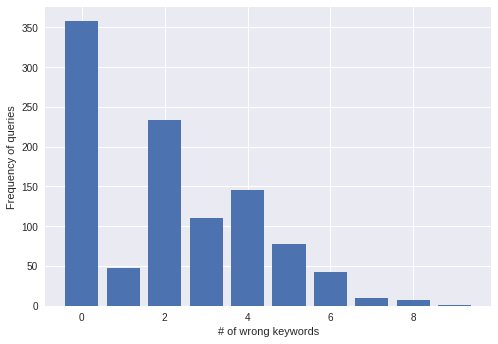

In [0]:
x={0: 358, 1: 48, 2: 234, 3: 110, 4: 146, 5: 78, 6: 42, 7: 10, 8: 7, 9: 1}
import matplotlib.pyplot as plt
w=[i for i in range(10)]
plt.bar(w, [x[i] for i in w])
plt.xlabel('# of wrong keywords')
plt.ylabel('Frequency of queries')
plt.show()

In [0]:
%%shell

TEST_DATA=syntaxsql/data/dev.json
SAVE_PATH=syntaxsql/generated_datasets/generated_data_augment/saved_models
echo $SAVE_PATH
python syntaxsql/allen_test.py \
    --test_data_path  ${TEST_DATA} \
    --models          ${SAVE_PATH} \
    --output_path     ${SAVE_PATH}/train_result.txt \
    --history_type    full \
    --table_type      std 

syntaxsql/generated_datasets/generated_data_augment/saved_models
Better speed can be achieved with apex installed from https://www.github.com/nvidia/apex.
Loading word embedding from syntaxsql/glove.42B.300d.txt
Using fixed embedding
Loading from modules...


In [0]:
from allennlp.models.archival import archive_model

archive_model("syntaxsql", "model.th")

In [0]:
%%shell


allennlp predict syntaxsql/model.tar.gz syntaxsql/data/dev.json \
    --predictor syntax_sql_predictor \
    --use-dataset-reader \
    --include-package syntaxsql.syntaxsql_supermodel \
    --include-package syntaxsql.syntax_sql_reader \
    --include-package syntaxsql.syntax_sql_predictor \
    --output-file syntaxsql/predictions.txt
    

Better speed can be achieved with apex installed from https://www.github.com/nvidia/apex.
2019-03-27 17:41:58,914 - INFO - allennlp.models.archival - loading archive file syntaxsql/model.tar.gz
2019-03-27 17:41:58,915 - INFO - allennlp.models.archival - extracting archive file syntaxsql/model.tar.gz to temp dir /tmp/tmp5g1_fpw9
loading word embedding
Loading word embedding from syntaxsql/glove.42B.300d.txt
creating model
Using fixed embedding
loading model
2019-03-27 17:46:23,631 - INFO - allennlp.common.from_params - instantiating class <class 'allennlp.data.dataset_readers.dataset_reader.DatasetReader'> from params {'type': 'syntax_sql_reader'} and extras {}
2019-03-27 17:46:23,632 - INFO - allennlp.common.params - dataset_reader.type = syntax_sql_reader
2019-03-27 17:46:23,632 - INFO - allennlp.common.from_params - instantiating class <class 'syntaxsql.syntax_sql_reader.SyntaxSqlDatasetReader'> from params {} and extras {}
1034it [00:00, 23195.38it/s]
./syntaxsql/models/multisql_pre

In [10]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

--2019-03-27 19:16:01--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 34.226.180.131, 34.206.253.53, 52.86.186.182, ...
Connecting to bin.equinox.io (bin.equinox.io)|34.226.180.131|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14977695 (14M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  14.28M  7.01MB/s    in 2.0s    

2019-03-27 19:16:04 (7.01 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [14977695/14977695]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [0]:
# %%shell

# python -m allennlp.service.server_simple  --archive-path syntaxsql/model.tar.gz  --predictor syntax_sql_predictor  --include-package syntaxsql.syntaxsql_supermodel  --include-package syntaxsql.syntax_sql_reader  --include-package syntaxsql.syntax_sql_predictor  --title "Syntax Sql Pretrained"  --field-name question_json --port 6006
# python -m allennlp.service.server_simple  \
#        --archive-path syntaxsql/model.tar.gz  \
#        --predictor syntax_sql_predictor  \
#        --include-package syntaxsql.syntaxsql_supermodel  \
#        --include-package syntaxsql.syntax_sql_reader \
#        --include-package syntaxsql.syntax_sql_predictor  \
#        --title "Syntax Sql Pretrained"  \
#        --field-name question_json \
#        --port 6006

LOG_DIR = 'syntaxsql/log'
get_ipython().system_raw(
          'python -m allennlp.service.server_simple  --archive-path syntaxsql/model.tar.gz  --predictor syntax_sql_predictor  --include-package syntaxsql.syntaxsql_supermodel  --include-package syntaxsql.syntax_sql_reader  --include-package syntaxsql.syntax_sql_predictor  --title "Syntax Sql Pretrained"  --field-name question_json --port 6006 &'
          .format(LOG_DIR)
)

In [19]:
get_ipython().system_raw('./ngrok http 6006 &')
! curl -s http://localhost:4040/api/tunnels | python -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

http://4835dac9.ngrok.io
